In [1]:
import sys
print(sys.executable)

C:\Users\Aquaregis32\.conda\envs\PyML32\python.exe


# Import necessary modules

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading the dataset
digits dataset: digits

In [3]:
digits = datasets.load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


## keys and description of the dataset

In [4]:
print("{}\n{}".format(digits.keys(),digits.DESCR))

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

Shape of data

In [5]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


Display img data 

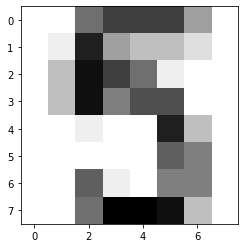

In [6]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Modelling 

In [7]:
# Import necessary modules
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [9]:
scores = {}
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
scores_values = [x for x in scores.values()]

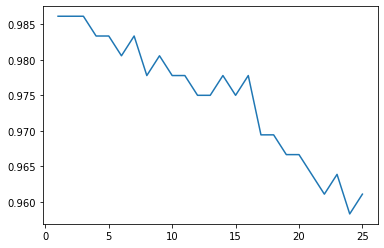

In [10]:
plt.clf()
plt.plot(k_range,scores_values)

Using KNN neighbours = 7

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))

0.9833333333333333


In [13]:
print("Accuracy on the training data: {}%".format(round(knn.score(X_train, y_train)*100,2)))
print("Accuracy on the testing data: {}%".format(round(knn.score(X_test, y_test)*100,2)))

Accuracy on the training data: 99.03%
Accuracy on the testing data: 98.33%
